Import the Libraries to start the program: 

*Pandas*
*json*
*urllib.request* to access the api

In [1]:
import urllib.request
import json
import pandas as pd

Define the source of the data. 
We would set the limit to be the number of rows in the dataset.
The IOPub data rate exceeds the limit, so instead of using the actual number of 
rows, we shrink it down to 10000

In [28]:
url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=d304108a-06c1-462f-a144-981dd0109900&limit=10000'  
fileobj = urllib.request.urlopen(url)

Convert the json response into a dictionary

In [29]:
encoding = fileobj.info().get_content_charset('utf8')
data = json.loads(fileobj.read().decode(encoding))

Extract the vehicle data. This dataset has *586,233* entry points.
It can be found in [here]("https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900")

In [30]:
array_of_dicts = data['result']['records']
print(array_of_dicts)

[{'Duty': 'Light', 'Make': 'OTHER/UNK', 'Vehicles': '1', 'Zip Code': '90000', 'Fuel': 'Gasoline', 'Date': '10/1/2018', '_id': 1, 'Model Year': '2006'}, {'Duty': 'Light', 'Make': 'OTHER/UNK', 'Vehicles': '1', 'Zip Code': '90000', 'Fuel': 'Gasoline', 'Date': '10/1/2018', '_id': 2, 'Model Year': '2014'}, {'Duty': 'Light', 'Make': 'OTHER/UNK', 'Vehicles': '1', 'Zip Code': '90000', 'Fuel': 'Gasoline', 'Date': '10/1/2018', '_id': 3, 'Model Year': '2016'}, {'Duty': 'Light', 'Make': 'OTHER/UNK', 'Vehicles': '1', 'Zip Code': '90000', 'Fuel': 'Gasoline', 'Date': '10/1/2018', '_id': 4, 'Model Year': '2017'}, {'Duty': 'Heavy', 'Make': 'OTHER/UNK', 'Vehicles': '55', 'Zip Code': '90000', 'Fuel': 'Diesel and Diesel Hybrid', 'Date': '10/1/2018', '_id': 5, 'Model Year': '<2006'}, {'Duty': 'Light', 'Make': 'OTHER/UNK', 'Vehicles': '2', 'Zip Code': '90000', 'Fuel': 'Diesel and Diesel Hybrid', 'Date': '10/1/2018', '_id': 6, 'Model Year': '<2006'}, {'Duty': 'Heavy', 'Make': 'WHITE', 'Vehicles': '19', 'Zip 

Convert the array of dictionaries to a panda's dataframe

In [31]:
data_frame = pd.DataFrame(array_of_dicts)

Print the dataframe

In [33]:
print(data_frame)

           Date   Duty                      Fuel           Make Model Year  \
0     10/1/2018  Light                  Gasoline      OTHER/UNK       2006   
1     10/1/2018  Light                  Gasoline      OTHER/UNK       2014   
2     10/1/2018  Light                  Gasoline      OTHER/UNK       2016   
3     10/1/2018  Light                  Gasoline      OTHER/UNK       2017   
4     10/1/2018  Heavy  Diesel and Diesel Hybrid      OTHER/UNK      <2006   
5     10/1/2018  Light  Diesel and Diesel Hybrid      OTHER/UNK      <2006   
6     10/1/2018  Heavy  Diesel and Diesel Hybrid          WHITE      <2006   
7     10/1/2018  Heavy          Battery Electric      OTHER/UNK      <2006   
8     10/1/2018  Light                  Gasoline      CHEVROLET      <2006   
9     10/1/2018  Light                  Gasoline          DODGE      <2006   
10    10/1/2018  Light                  Gasoline           FORD      <2006   
11    10/1/2018  Light                  Gasoline            GMC 

Select only the columns of interest, which are Fuel, Make, Model Year, and Vehicles

In [34]:
col_list = ['Fuel', 'Make', 'Model Year', 'Vehicles']

In [35]:
data_frame = data_frame[col_list]

In [36]:
print(data_frame)

                          Fuel           Make Model Year Vehicles
0                     Gasoline      OTHER/UNK       2006        1
1                     Gasoline      OTHER/UNK       2014        1
2                     Gasoline      OTHER/UNK       2016        1
3                     Gasoline      OTHER/UNK       2017        1
4     Diesel and Diesel Hybrid      OTHER/UNK      <2006       55
5     Diesel and Diesel Hybrid      OTHER/UNK      <2006        2
6     Diesel and Diesel Hybrid          WHITE      <2006       19
7             Battery Electric      OTHER/UNK      <2006        4
8                     Gasoline      CHEVROLET      <2006       33
9                     Gasoline          DODGE      <2006       11
10                    Gasoline           FORD      <2006       28
11                    Gasoline            GMC      <2006       19
12                    Gasoline      OTHER/UNK      <2006       55
13                    Gasoline      OTHER/UNK      <2006       35
14        

Group the data by fuel type

In [37]:
fuel_type = data_frame.groupby(['Fuel', 'Model Year']).agg('Model Year').size()

In [38]:
print(fuel_type)

Fuel                      Model Year
Battery Electric          2006            4
                          2007            6
                          2008            5
                          2009            5
                          2010            5
                          2011           18
                          2012           18
                          2013           26
                          2014           25
                          2015           25
                          2016           41
                          2017           45
                          2018           38
                          2019            1
                          <2006          21
Diesel and Diesel Hybrid  2006           53
                          2007           54
                          2008           54
                          2009           53
                          2010           49
                          2011           57
                          2012         

Group by make

In [39]:
make_type = data_frame.groupby(['Make', 'Model Year', 'Fuel']).agg('Fuel').size()

In [40]:
print(make_type)

Make               Model Year  Fuel                    
ACURA              2006        Gasoline                    18
                   2007        Gasoline                    13
                   2008        Gasoline                    13
                   2009        Gasoline                     6
                   2010        Gasoline                     9
                   2011        Gasoline                     2
                   2012        Gasoline                    10
                   2013        Gasoline                     7
                   2014        Gasoline                     4
                   2015        Gasoline                     8
                   2016        Gasoline                     7
                   2017        Gasoline                     8
                   2018        Gasoline                     7
                   <2006       Gasoline                    24
ALFA ROMEO         2017        Gasoline                     1
              

Convest the column "Vehicles" to an int so that we can analyse it numerically

In [41]:
data_frame = data_frame.astype({'Vehicles': 'int'})

Diesel and Diesel Hybrid

In [44]:
diesel_and_diesel_hybrid = (data_frame['Fuel'] == 'Diesel and Diesel Hybrid')#  or data_frame['Fuel'] == 'Hybrid Gasoline' or data_frame['Fuel'] == 'Battery Electric')
diesel_and_diesel_hybrid = data_frame[diesel_and_diesel_hybrid] 
diesel_and_diesel_hybrid = diesel_and_diesel_hybrid.groupby(['Model Year'])['Vehicles'].sum()
print(diesel_and_diesel_hybrid)

Model Year
2006      762
2007      632
2008      757
2009      627
2010      468
2011      539
2012      870
2013      583
2014      648
2015      751
2016      778
2017      660
2018      321
2019       67
<2006    6827
Name: Vehicles, dtype: int32


Hybrid Gasoline

In [45]:
hybrid_gasoline = (data_frame['Fuel'] == 'Hybrid Gasoline')
hybrid_gasoline = data_frame[hybrid_gasoline]
hybrid_gasoline = hybrid_gasoline.groupby(['Model Year'])['Vehicles'].sum()
print(hybrid_gasoline)

Model Year
2006      987
2007     1870
2008     1536
2009      860
2010     1753
2011     1115
2012     1682
2013     2054
2014     1641
2015     2830
2016     2062
2017     2215
2018     1206
2019       54
<2006    1542
Name: Vehicles, dtype: int32


Battery Electric

In [47]:
battery_electric = (data_frame['Fuel'] == 'Battery Electric')
battery_electric = data_frame[battery_electric]
battery_electric = battery_electric.groupby(['Model Year'])['Vehicles'].sum()
print(battery_electric)

Model Year
2006       35
2007       26
2008       28
2009       19
2010       11
2011       48
2012       65
2013      191
2014      157
2015      279
2016      752
2017     1322
2018      649
2019       73
<2006     348
Name: Vehicles, dtype: int32


Plug-in Hybrid

In [49]:
plug_in_hybrid = (data_frame['Fuel'] == 'Plug-in Hybrid')
plug_in_hybrid = data_frame[plug_in_hybrid]
plug_in_hybrid = plug_in_hybrid.groupby(['Model Year'])['Vehicles'].sum()
print(plug_in_hybrid)

Model Year
2011     19
2012    129
2013    155
2014    297
2015    277
2016    460
2017    946
2018    605
2019      5
Name: Vehicles, dtype: int32


All Electric or Hybrid

In [50]:
any_electric_or_hybrid = diesel_and_diesel_hybrid.add(hybrid_gasoline, fill_value=0)
any_electric_or_hybrid = any_electric_or_hybrid.add(battery_electric, fill_value=0)
any_electric_or_hybrid = any_electric_or_hybrid.add(plug_in_hybrid, fill_value=0)
print(any_electric_or_hybrid)

Model Year
2006     1784.0
2007     2528.0
2008     2321.0
2009     1506.0
2010     2232.0
2011     1721.0
2012     2746.0
2013     2983.0
2014     2743.0
2015     4137.0
2016     4052.0
2017     5143.0
2018     2781.0
2019      199.0
<2006    8717.0
Name: Vehicles, dtype: float64


Gasoline

In [51]:
gasoline = (data_frame['Fuel'] == 'Gasoline')
gasoline = data_frame[gasoline]
gasoline = gasoline.groupby(['Model Year'])['Vehicles'].sum()
print(gasoline)

Model Year
2006      26973
2007      26133
2008      21941
2009      15022
2010      15381
2011      16221
2012      19913
2013      23779
2014      23603
2015      32170
2016      37670
2017      37091
2018      32313
2019       1414
<2006    224837
Name: Vehicles, dtype: int32


Flex-Fuel

In [52]:
flex_fuel = (data_frame['Fuel'] == 'Flex-Fuel')
flex_fuel = data_frame[flex_fuel]
flex_fuel = flex_fuel.groupby(['Model Year'])['Vehicles'].sum()
print(flex_fuel)

Model Year
2006      717
2007     1154
2008      712
2009      702
2010     1010
2011     1302
2012     1225
2013     1409
2014     1311
2015     1134
2016     1449
2017     1169
2018      505
<2006    4835
Name: Vehicles, dtype: int32


**Combine all the non-electric vehicle counts**

In [53]:
print('All Fuel')
any_fuel = flex_fuel.add(gasoline, fill_value=0)
print(any_fuel)

All Fuel
Model Year
2006      27690.0
2007      27287.0
2008      22653.0
2009      15724.0
2010      16391.0
2011      17523.0
2012      21138.0
2013      25188.0
2014      24914.0
2015      33304.0
2016      39119.0
2017      38260.0
2018      32818.0
2019       1414.0
<2006    229672.0
Name: Vehicles, dtype: float64


In [54]:
import matplotlib.pyplot as plt

In [62]:
try:
    index_names = any_fuel[any_fuel['Model Year'] == '<2006'].index
    any_fuel.drop(index_names, inplace=True)
except KeyError:
    print('No KeyError')

No KeyError


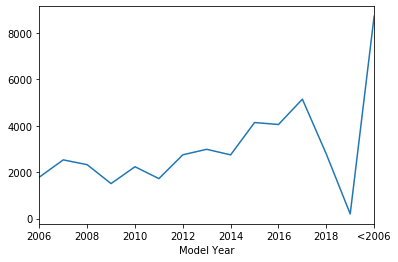

In [56]:
any_electric_or_hybrid.plot()
plt.show()

*Note* 
The analysis was done in a local machine, where all the rows were considered.
Here, with a limit of 10,000 rows, the analysis fails to get the results 
yielded from the entire dataset.
As the sales in 2019 and 2020 increase for both electric/hybrid and fuel 
vehicles, it is reasonable to invest in gas stations Shell, British Petrolium (BP) and energy association AEE (Association of Energy Engineers)